<a href="https://colab.research.google.com/github/Shivansh1969/Digit_recognition_algo/blob/main/DigitRecognition_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [2]:
# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

print(f"x_train shape: {x_train.shape}")
print(f"y_train_cat shape: {y_train_cat.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test_cat shape: {y_test_cat.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train shape: (60000, 28, 28, 1)
y_train_cat shape: (60000, 10)
x_test shape: (10000, 28, 28, 1)
y_test_cat shape: (10000, 10)


In [3]:
# Define the model
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
history = model.fit(
    x_train, y_train_cat,
    batch_size=128,
    epochs=10,
    validation_data=(x_test, y_test_cat),
    verbose=1
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 95ms/step - accuracy: 0.8070 - loss: 0.6226 - val_accuracy: 0.9773 - val_loss: 0.0683
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 93ms/step - accuracy: 0.9687 - loss: 0.1082 - val_accuracy: 0.9871 - val_loss: 0.0413
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 92ms/step - accuracy: 0.9767 - loss: 0.0769 - val_accuracy: 0.9872 - val_loss: 0.0385
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 93ms/step - accuracy: 0.9824 - loss: 0.0588 - val_accuracy: 0.9896 - val_loss: 0.0296
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 93ms/step - accuracy: 0.9853 - loss: 0.0502 - val_accuracy: 0.9904 - val_loss: 0.0253
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 82s 93ms/step - accuracy: 0.9870 - loss: 0.0433 - val_accuracy: 0.9905 - val_loss: 0.0271
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 98ms/step - accuracy: 0.9876 - loss: 0.0401 - val_accuracy: 0.9916 - val_loss: 0.0260
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 80s 95ms/step - accuracy: 0.9900 - loss: 0.0342 - 

In [5]:
loss, accuracy = model.evaluate(x_test, y_test_cat)
print(f"Test Accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9898 - loss: 0.0272
Test Accuracy: 0.9919


In [6]:
# Make predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Display classification report
from sklearn.metrics import classification_report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

Classification Report:

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.99      0.99      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



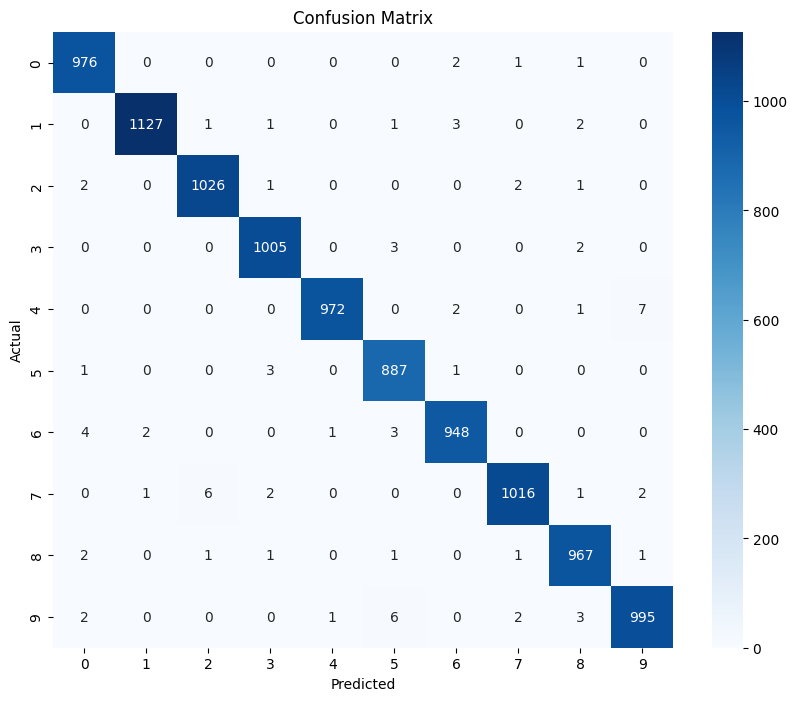

In [7]:
# Display confusion matrix
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


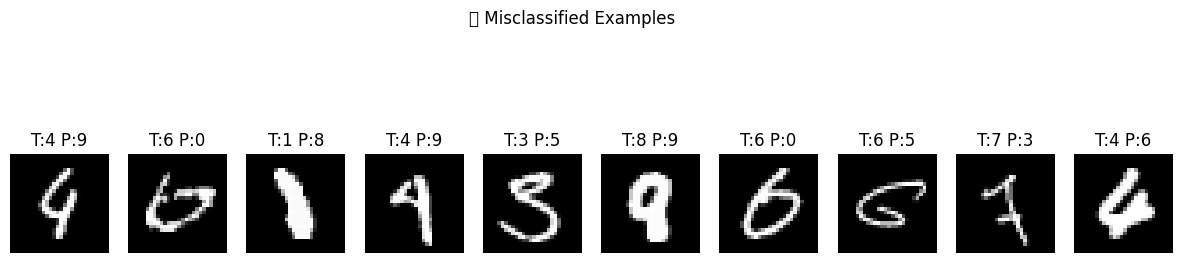

In [8]:
# Plot misclassified examples
def plot_misclassified(x, y_true, y_pred, n=10):
    misclassified = np.where(y_true != y_pred)[0]
    plt.figure(figsize=(15, 4))
    for i, wrong in enumerate(misclassified[:n]):
        plt.subplot(1, n, i + 1)
        plt.imshow(x[wrong].reshape(28, 28), cmap='gray')
        plt.title(f"T:{y_true[wrong]} P:{y_pred[wrong]}")
        plt.axis('off')
    plt.suptitle("❌ Misclassified Examples")
    plt.show()

plot_misclassified(x_test, y_test, y_pred_classes)

In [10]:
if 'user_img' in locals() and user_img is not None:
    user_prediction = model.predict(user_img)
    predicted_class = np.argmax(user_prediction)

    print(f"\nPredicted Digit for user image: {predicted_class}")

    plt.imshow(user_img.reshape(28, 28), cmap='gray')
    plt.title(f"Predicted Digit: {predicted_class}")
    plt.axis('off')
    plt.show()
else:
    print("User image not loaded or preprocessed correctly. Please ensure 'user_img' variable exists and is not None.")

User image not loaded or preprocessed correctly. Please ensure 'user_img' variable exists and is not None.
